# PREDICTING BRAIN STROKE USING LOGISTIC REGRESSION AND K-NEAREST NEIGHBOUR

# Part 01 - Preparing the Data

## Importing the Necessary Libraries

In [2]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report
import warnings
warnings.filterwarnings('ignore')

## Loading and Exploring the Data

In [4]:
df_dataset=pd.read_csv("dataset.csv")

In [5]:
df_dataset.shape
df_dataset.columns
df_dataset.info()
df_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
df_dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
df_dataset.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [8]:
# Checking to see whether there are any NULL values in our dataset:
df_dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Exploratory Data Analysis

In [9]:
df_cat=df_dataset[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]

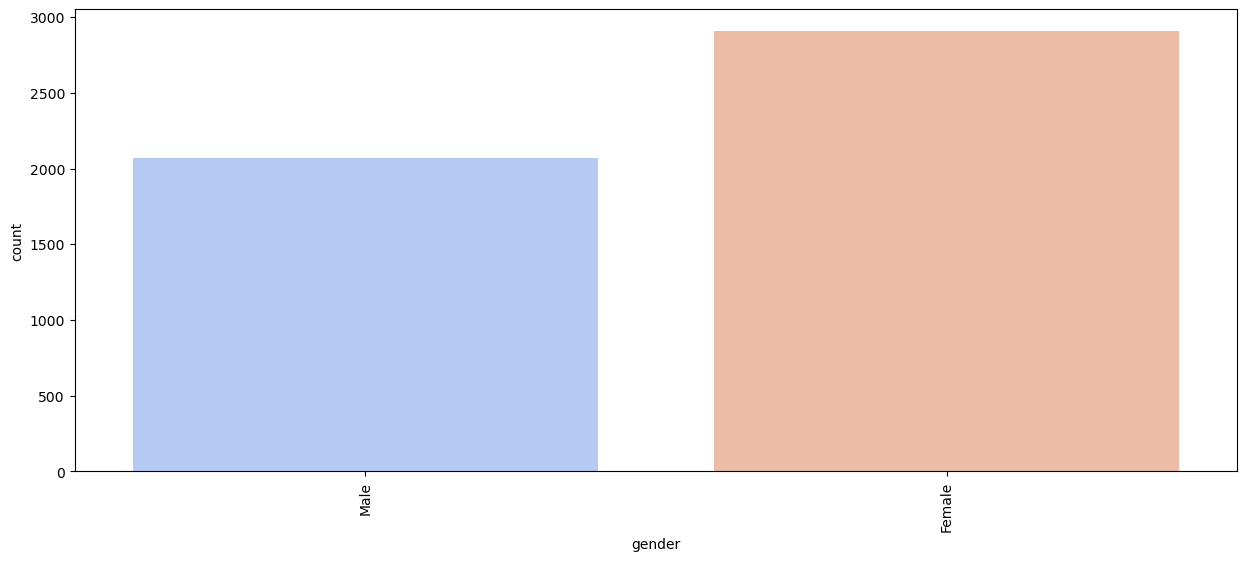

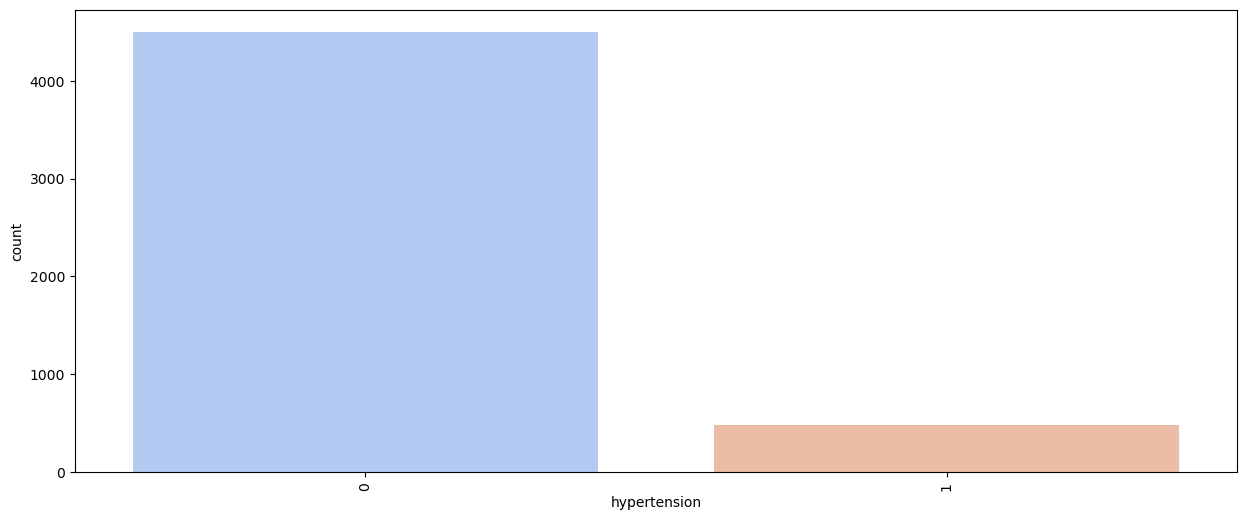

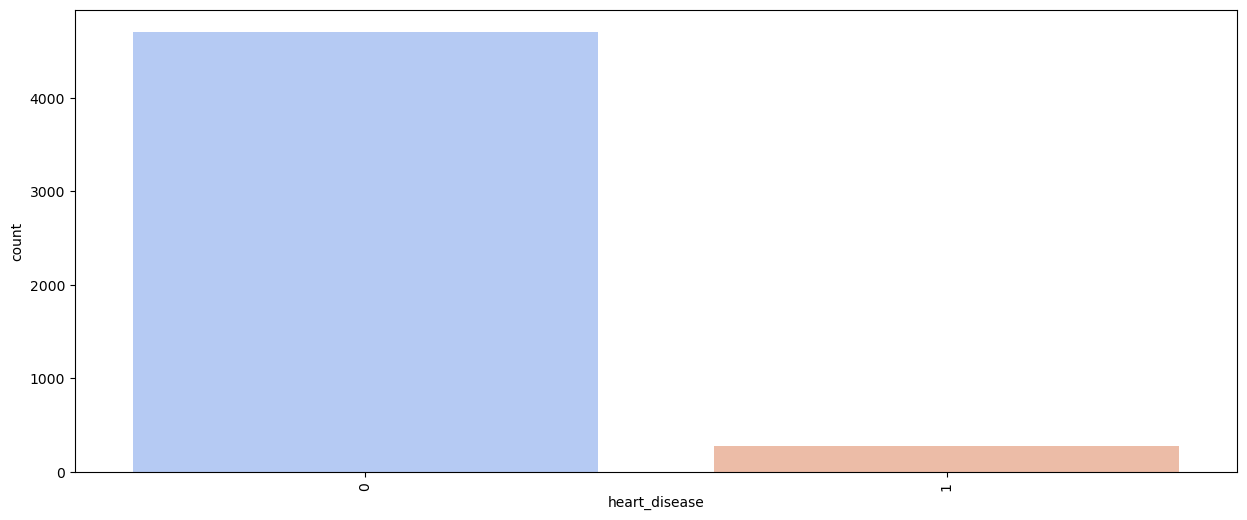

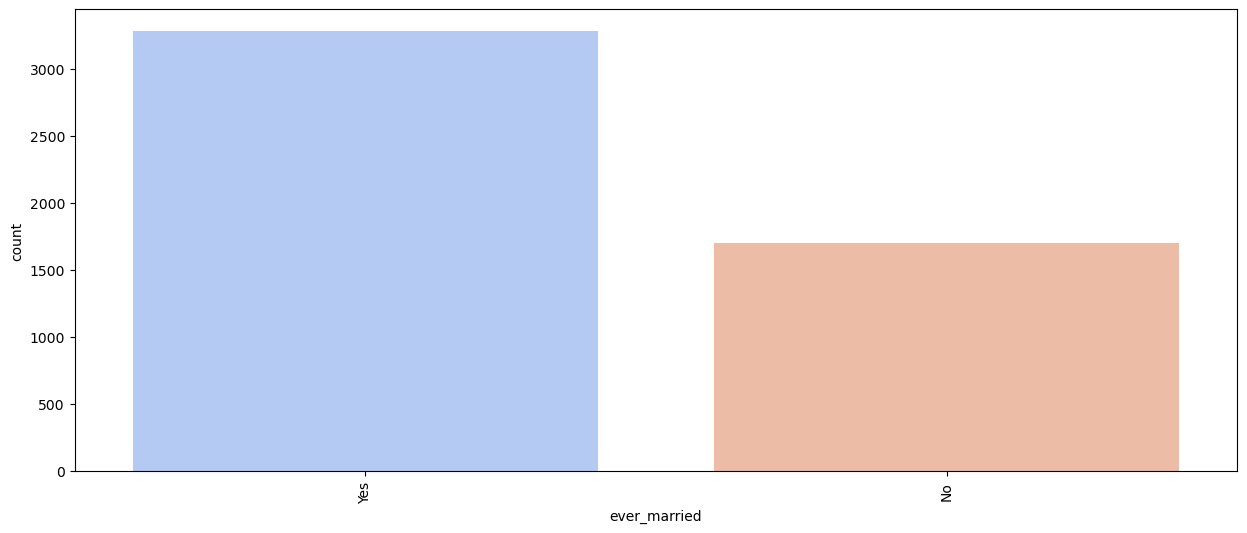

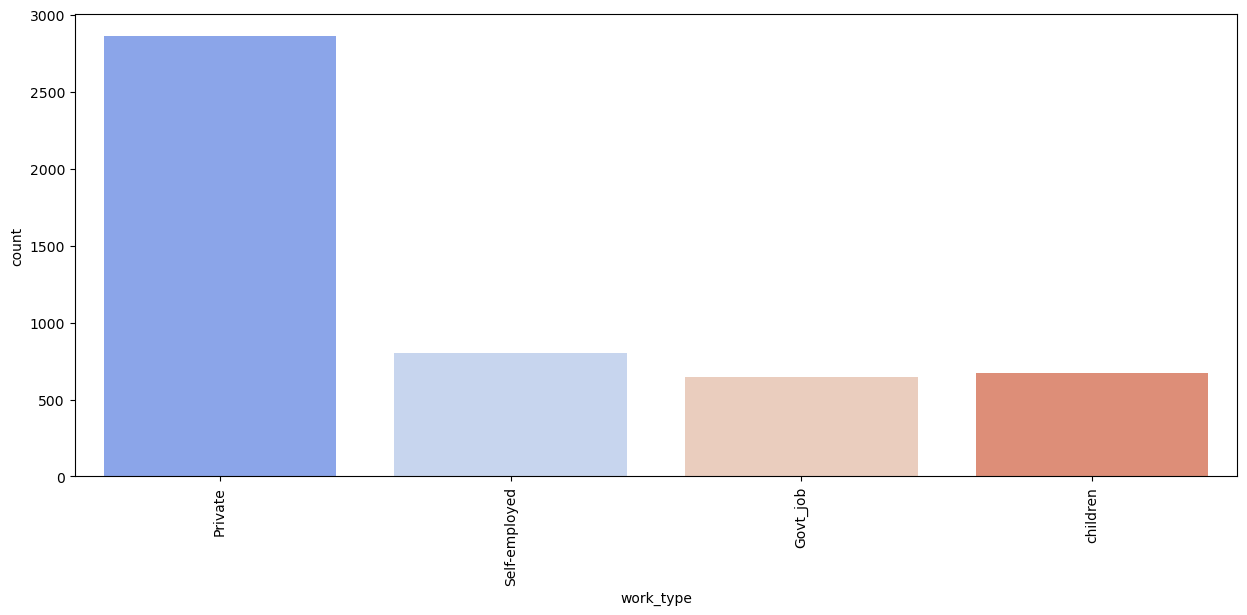

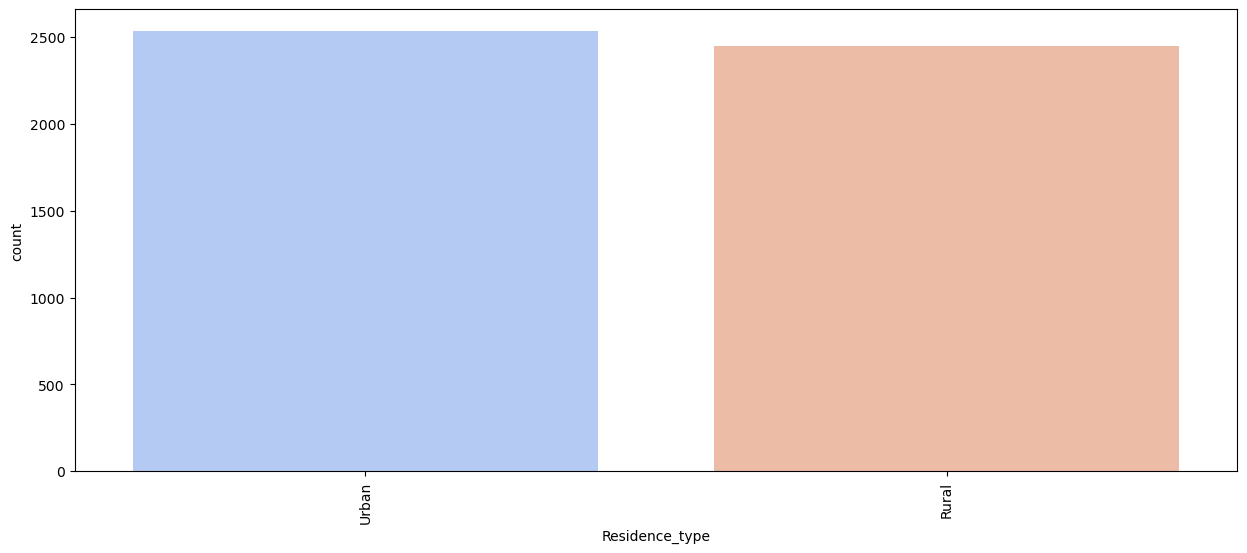

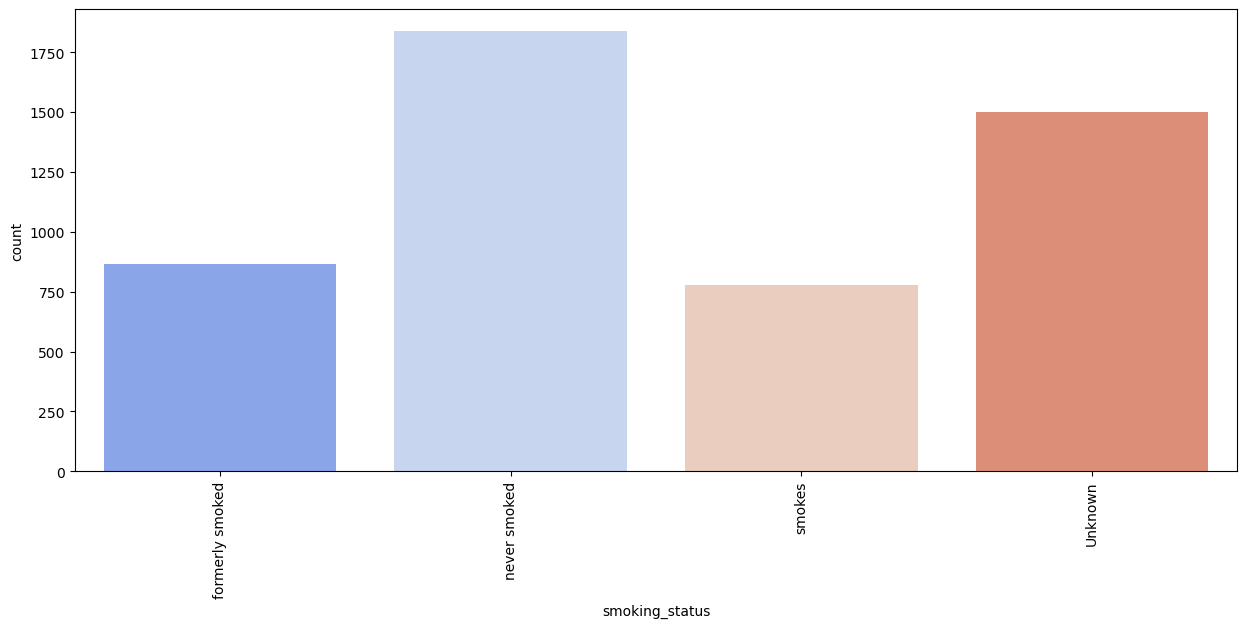

In [10]:
for i in df_cat.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(x=df_cat[i],data=df_cat,palette='coolwarm')
    plt.xticks(rotation=90)
    plt.show()

#### Observations: 
* The greatest discrepancy is found in 'hypertension' and 'heart_disease'.
* The number of unknown counts in 'smoking_status' is quite high.
* The 'Residence_type' is most evenly distributed.

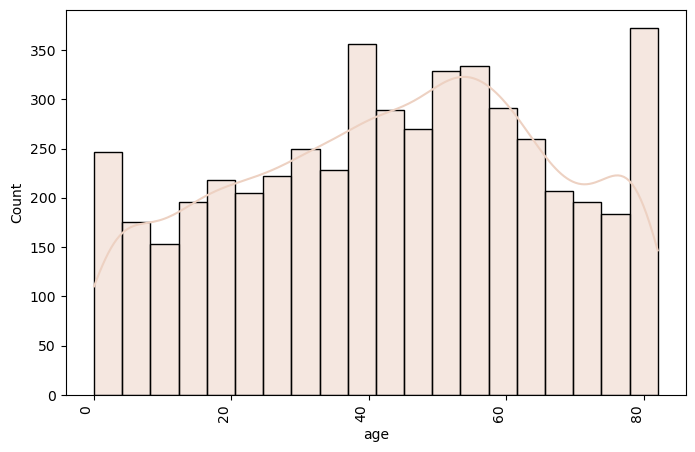

In [11]:
plt.figure(figsize=(8,5))
palette=sns.color_palette("coolwarm")
sns.histplot(df_dataset['age'],kde=True,color=palette[3])
plt.xticks(rotation=90,ha="right")
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Self-employed'),
  Text(2, 0, 'Govt_job'),
  Text(3, 0, 'children')])

<Figure size 1200x800 with 0 Axes>

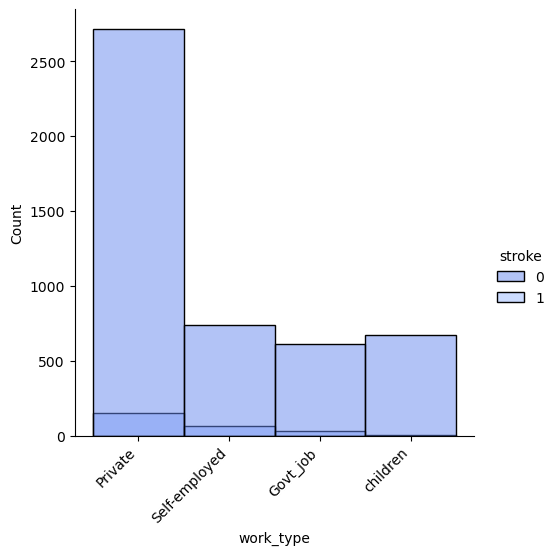

In [12]:
plt.figure(figsize=(12,8))
palette = sns.color_palette("coolwarm")
sns.displot(data=df_dataset, x="work_type", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")

From this chart it appears those who are self-employed or working a government job are more likely to have a brain stroke.
Although at first glance private employees have the most cases, they're also the largest in number and the percentage is lower compared to the other two. However, correlation doesn't equal causation. Next, let's look at the comparison between brain stroke cases and non-cases:

stroke
0    4733
1     248
Name: count, dtype: int64
Percentage of non-stroke cases:  95.0210801043967
Percentage of stroke cases:  4.978919895603292


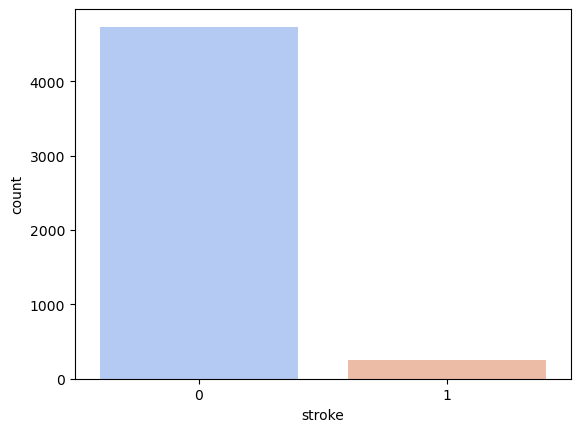

In [13]:
target='stroke'
X=df_dataset.loc[:,df_dataset.columns!=target]
y=df_dataset.loc[:,df_dataset.columns==target]

columns=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
X=pd.get_dummies(X[columns])

ax=sns.countplot(x=target,data=df_dataset,palette='coolwarm')
print(df_dataset[target].value_counts())

no_stroke_percentage=100*(4733/float(df_dataset.shape[0]))
stroke_percentage=100*(248/float(df_dataset.shape[0]))
print('Percentage of non-stroke cases: ',no_stroke_percentage)
print('Percentage of stroke cases: ',stroke_percentage)

There is a visible case of oversampling, as there is a vast imbalance in the number of patients who didn't have a stroke and those who did. This imbalance will need to be addressed.

## Using SMOTE to Fix the Oversampling

I used 'Synthetic Minority Over-sampling Technique' to normalize the data.

#### Converting the values to numeric data:

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df_dataset['gender']=encoder.fit_transform(df_dataset['gender'])
df_dataset['ever_married']=encoder.fit_transform(df_dataset['ever_married'])
df_dataset['Residence_type']=encoder.fit_transform(df_dataset['Residence_type'])

In [15]:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_dataset.columns:
    if df_dataset[col].dtype=='object':
        df_dataset[col]=le.fit_transform(df_dataset[col])

In [16]:
['Private' 'Self-employed' 'Govt_job' 'children']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_dataset.columns:
    if df_dataset[col].dtype=='object':
        df_dataset[col]=le.fit_transform(df_dataset[col])

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

X=df_dataset.drop(columns=['stroke'])
y=df_dataset['stroke']

# Splitting dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Checking the class distribution before applying SMOTE:
print("Ratio of stroke instances before SMOTE:", Counter(y_train))

Ratio of stroke instances before SMOTE: Counter({0: 3786, 1: 198})


In [18]:
smote=SMOTE(random_state=42)

X_train_resampled, y_train_resampled=smote.fit_resample(X_train, y_train)

# Checking class distribution after SMOTE:
print("Ratio of stroke instances after SMOTE:", Counter(y_train_resampled))

Ratio of stroke instances after SMOTE: Counter({0: 3786, 1: 3786})


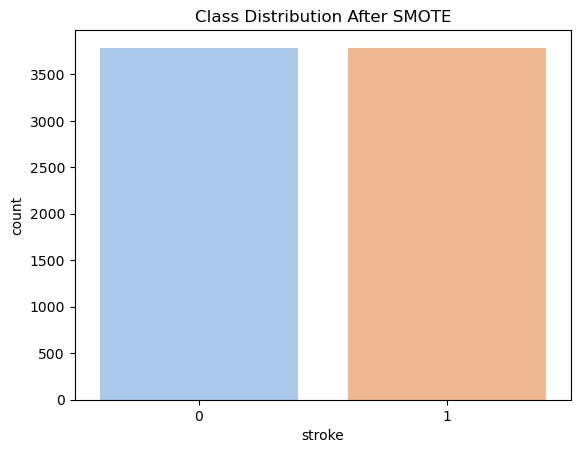

Original dataset shape: (3984, 10)
Resampled dataset shape: (7572, 10)


In [19]:
import pandas as pd
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)

X_resampled_df=pd.DataFrame(X_resampled,columns=X_train.columns)
y_resampled_df=pd.DataFrame(y_resampled,columns=['stroke'])

new_dataset=pd.concat([X_resampled_df, y_resampled_df],axis=1)

sns.countplot(x=y_train_resampled, palette="pastel")
plt.title("Class Distribution After SMOTE")
plt.show()

print(f"Original dataset shape: {X_train.shape}")
print(f"Resampled dataset shape: {X_train_resampled.shape}")

Saving the new dataset to use for model training:

In [20]:
new_dataset.to_csv('new_dataset.csv', index=False)
print("Data saved as new_dataset.csv")

Data saved as new_dataset.csv


## Computing a Heat Map

Next, I looked at the correlations between each pair of variables using the Pearson Correlation Matrix. This will help me determine which ones to keep and which to drop (if any).

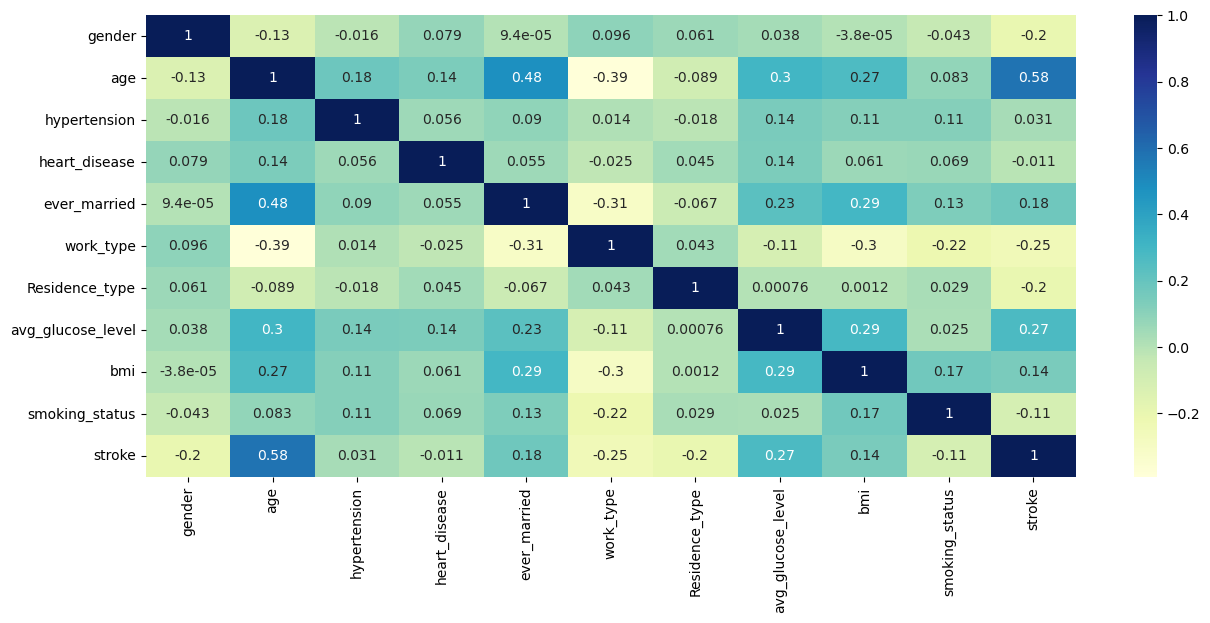

In [21]:
corr=new_dataset.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap="YlGnBu")
plt.show()

According to this heat map, 'age' has the strongest correlation to 'stroke'. 'Residence_type' and 'gender' have the lowest correlation, so I might consider dropping them as they won't contribute much to predicting the target. But first I took a closer look at the correlations the independent variables have to the target:

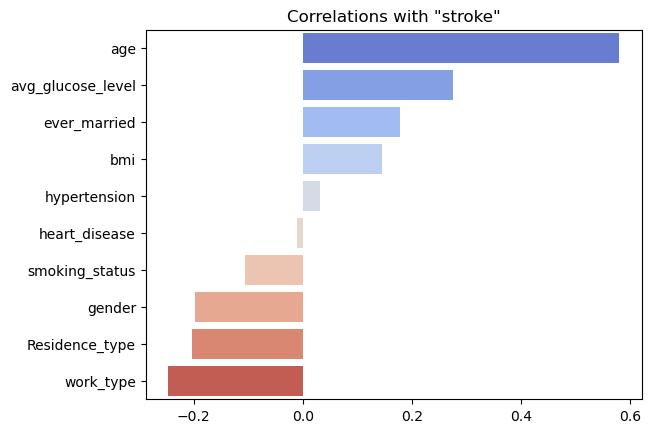

In [22]:
limit=-1.0
data=new_dataset.corr()["stroke"].sort_values(ascending=False)
indices=data.index
labels=[]
corr=[]
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr,y=labels, palette="coolwarm")
plt.title('Correlations with "stroke"')
plt.show()

I then confirmed it further with the help of some more methods:

In [23]:
X=new_dataset.drop(['stroke'],axis=1)
y=new_dataset['stroke']

In [24]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif,f_classif
chi2=SelectKBest(score_func=chi2,k='all').fit(X,y)
chi2_sorted=pd.Series(data=chi2.scores_,index=X.columns).sort_values()
ftest=SelectKBest(score_func=f_classif,k='all').fit(X,y)
ftest_sorted=pd.Series(data=ftest.scores_,index=X.columns).sort_values()
mitest=SelectKBest(score_func=mutual_info_classif,k='all').fit(X,y)
mitest_sorted=pd.Series(data=mitest.scores_,index=X.columns).sort_values()

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
xtrees=ExtraTreesClassifier().fit(X,y)
xtrees_sorted=pd.Series(data=xtrees.feature_importances_,index=X.columns).sort_values()
from sklearn.feature_selection import mutual_info_classif
muinfo=mutual_info_classif(X,y)
muinfo_sorted=pd.Series(data=muinfo,index=X.columns).sort_values()

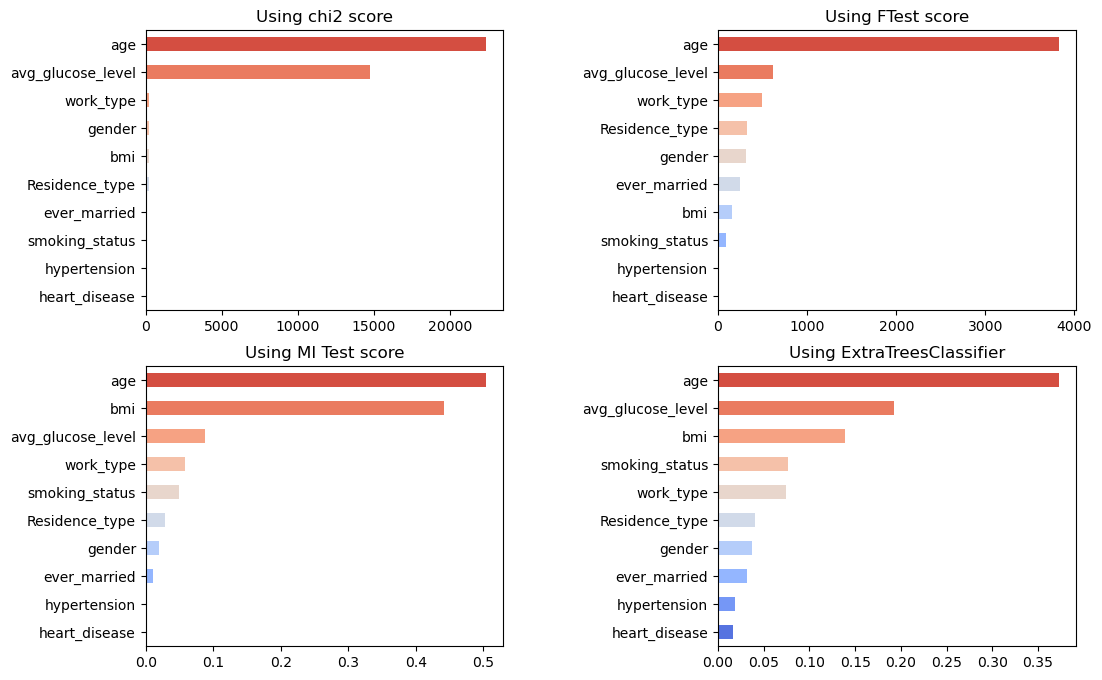

In [26]:
# Presenting the findings in visual form:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,8))
plt.subplots_adjust(wspace=0.6)

chi2_sorted.plot(kind='barh',ax=axes[0,0],title='Using chi2 score',color=sns.color_palette("coolwarm",len(chi2_sorted)))
ftest_sorted.plot(kind='barh',ax=axes[0,1],title='Using FTest score',color=sns.color_palette("coolwarm",len(ftest_sorted)))
xtrees_sorted.plot(kind='barh',ax=axes[1,1],title='Using ExtraTreesClassifier',color=sns.color_palette("coolwarm",len(xtrees_sorted)))
mitest_sorted.plot(kind='barh',ax=axes[1,0],title='Using MI Test score',color=sns.color_palette("coolwarm",len(mitest_sorted)))

plt.show()

These graphs show that 'heart_disease' and 'hypertension' have the lowest impact on 'stroke', however this may also be because they have the lowest values. I've decided not to drop any of the columns as I feel both 'heart_disease' and 'hypertension' are still contributing factors to a brain stroke.

# PART 02 - PREDICTING & EVALUATING THE DATA

After analyzing the data and fixing the oversampling, I proceeded to train my models.

## Performing Logistic Regression:

Accuracy: 0.8033

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       758
           1       0.80      0.80      0.80       757

    accuracy                           0.80      1515
   macro avg       0.80      0.80      0.80      1515
weighted avg       0.80      0.80      0.80      1515



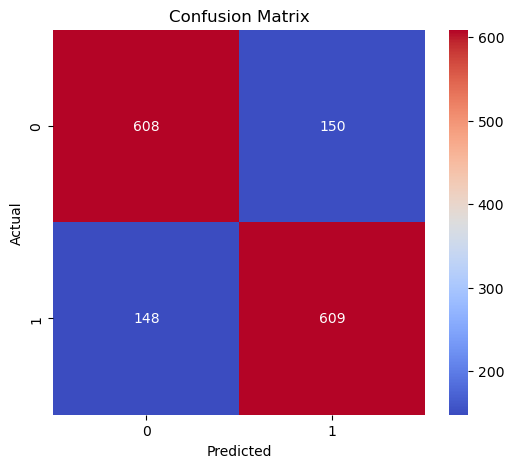

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

df=pd.read_csv("new_dataset.csv")

X=df.drop(columns=["stroke"])
y=df["stroke"]

# Splitting the data into training and testing sets (80% train, 20% test):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing the features:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Training the Logistic Regression model:
model=LogisticRegression(max_iter=200,random_state=42)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

# Model Evaluation:
accuracy=accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n",classification_report(y_test, y_pred))

# Computing and plotting a Confusion Matrix:
conf_matrix=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="coolwarm",xticklabels=model.classes_,yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Findings:
*  The model has an accuracy of 80.33%, meaning it correctly predicts the class 80.33% of the time.
*  When the model predicts a class, it is correct 80% of the time.
*  The model correctly identifies 80% of actual positives.
*  I would say the overall result is decent.

## Performing K-Nearest Neighbour:

Accuracy: 0.8805

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.87       758
           1       0.84      0.94      0.89       757

    accuracy                           0.88      1515
   macro avg       0.89      0.88      0.88      1515
weighted avg       0.89      0.88      0.88      1515



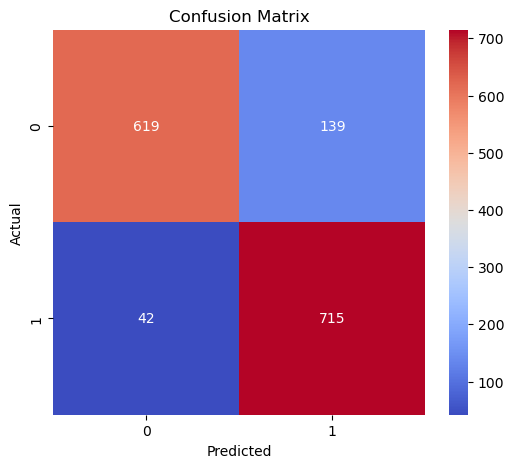

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

df=pd.read_csv("new_dataset.csv")

X=df.drop(columns=["stroke"])
y=df["stroke"]

# Splitting the data into training and testing sets (80% train, 20% test):
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Standardizing the features:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Training the KNN model and choosing k=5 as default:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

# Model Evaluation:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n",classification_report(y_test,y_pred))

# Computing and plotting the Confusion Matrix:
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="coolwarm",xticklabels=knn.classes_,yticklabels=knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Findings:
*  The model achieved an accuracy of 88.05% which is higher than Logistic Regression.
*  When the model predicts a class, it is correct 88.05% of the time.
*  In cases of 'stroke', the model is correct 84% of the time.
*  In cases of predicting 'non-stroke', the model is correct 94% of the time.
*  Of the two models, this is the clear winner.

## Performing K-fold Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
import numpy as np

# Defining the number of folds:
kf=KFold(n_splits=5,shuffle=True,random_state=42)

# Initializing the models:
lin_reg=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=5)

# Performing Cross-Validation:
lin_reg_scores=cross_val_score(lin_reg,X,y,cv=kf,scoring='r2')
knn_scores=cross_val_score(knn,X,y,cv=kf,scoring='r2')
print(f"Linear Regression R² Score: {lin_reg_scores.mean():.4f}±{lin_reg_scores.std():.4f}")
print(f"KNN Regression R² Score: {knn_scores.mean():.4f}±{knn_scores.std():.4f}")

Linear Regression R² Score: 0.4326±0.0184
KNN Regression R² Score: 0.6717±0.0239
